In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
class Perceptron:
    def __init__(self, learning_rate = 0.003, n_iterations = 1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None 
    
    def fit(self, X,y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for (x_i, y_i) in zip(X,y):
                lin_output = y_i *(np.dot(self.weights, x_i) + self.bias)
                y_pred = np.sign(lin_output)
                if y_pred != y_i: # misclassified
                    self.weights += self.learning_rate * y_i * x_i 
                    self.bias += self.learning_rate * y_i

    def predict(self, X):
        lin_output = np.dot(self.weights, X) + self.bias
        return np.sign(lin_output)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class Backpropogation:
    def __init__(self, learning_rate = 0.003, n_iterations = 10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.loss_history = []
        self.weights = None 
        self.bias = None 
    
    def fit(self, X,y):
        n_samples, n_features = X.shape 
        self.weights = np.zeros(n_features)
        self.bias = 0


        for _ in range(self.n_iterations):
            z = np.dot(X, self.weights) + self.bias 
            y_hat = sigmoid(z)

            loss = (-(y*np.log(y_hat) + (1-y)*np.log(1- y_hat))).mean()
            self.loss_history.append(loss)

            # gradients
            d_y_hat = -(y/y_hat) + (1-y)/(1-y_hat)
            dz = d_y_hat * y_hat * (1 - y_hat)

            # average gradients
            dw = np.dot(X.T, dz)/ n_samples
            db = dz.mean()

            # update parameters
            self.weights -= self.learning_rate * dw 
            self.bias -= self.learning_rate * db 

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias 
        return sigmoid(z)
    
    # when calling this fn- the model uses the learned weights and biases to compute probabilties for the sample X and classify them
    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

In [48]:
X, y = make_classification(n_samples=10000, n_features=5, n_informative=3,
                           n_redundant=0, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

model = Backpropogation()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy}%")


Test Accuracy: 0.867%


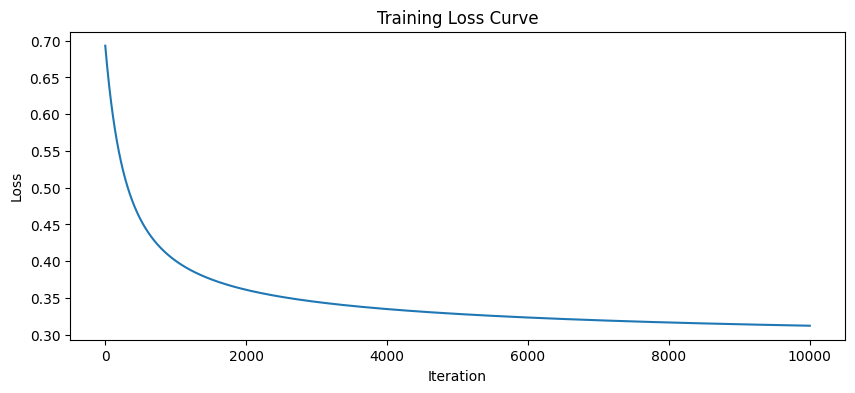

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))
plt.plot(model.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()